# AARP Assessment

### Given
In modeling process, data wrangling usually takes up to 80% of entire time. To build a good predictive model, except for trying various modeling methods, picking right (the most relevant) variables and transforming raw data to the useful information can significantly help boost model performance.  The purpose of this exercise is to evaluate your capability of analyzing and processing data related to individuals’ web behavior on AARP.org website.

The table is named “online activity test” which includes each individual’s clicks on AARP.org in the past 6 months. This is a transaction table, so one individual can have multiple rows to show the clicks at different timestamps.  The table contains 5 columns and 10,000 rows.

Member_id - if someone has member_id it means the person is an AARP paid member, otherwise not a member.
Browser_id – every single click has a browser id shown up no matter members or non-members.
Register_id – if someone has register_id it means the person created an online account on AARP.org, but didn’t necessarily join AARP membership (i.e. became a paid member)
Date_time – it shows time stamp for every single click.
url - it contains the URL string when individual clicked the page. On AARP site, left bar shows the major content channels (my screenshot only shows a portion). If this variable shows “games:/games/mahjongg-solitaire”, it means the person clicked something under “Games”. Similarly, “www:/health/conditions-treatments/info-2020/” means this URL belong to “Health” channel.

#### All the required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
from datetime import date
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


from pandas.api.types import CategoricalDtype

#### Loading the Dataset

In [2]:
data = pd.read_csv('online_activity_test_.csv')
MyData=data.copy()
data.head()

,member_id,browser_id,register_id,date_time,url
0,NaN,3.020000e+37,NaN,2020-08-08T19:09:26.000Z,NaN
1,5.443924e+09,4.830000e+37,NaN,2020-08-08T19:53:48.000Z,www:/money/taxes/info-2020/states-that-dont-ta...
2,NaN,4.830000e+37,NaN,2020-08-08T19:32:18.000Z,games:/games/bubble-dragons
3,5.131951e+09,3.050000e+37,34999201.0,2020-08-08T19:03:08.000Z,games:/games/forty-thieves-solitaire
4,1.473905e+09,4.860000e+37,94842213.0,2020-08-08T19:37:28.000Z,games:/games/mahjongg-solitaire


# Data Understanding

In [3]:
# Shape of the dataset given
data.shape

(10000, 5)

In [4]:
# Names of the columns of the dataset
data.columns

Index(['member_id', 'browser_id', 'register_id', 'date_time', 'url'], dtype='object')

In [5]:
# Types of each column in the dataset
data.dtypes

member_id      float64
browser_id     float64
register_id    float64
date_time       object
url             object
dtype: object

#### Datetime column is object datatype, changing the datatype to type DateTime

In [6]:
data['date_time'] = pd.to_datetime(data['date_time'])
data.dtypes

member_id                  float64
browser_id                 float64
register_id                float64
date_time      datetime64[ns, UTC]
url                         object
dtype: object

In [7]:
#### Number of Unique URLs
len(data['url'].unique())

1376

In [8]:
#### Number of Unique Members
len(data['member_id'].unique())

2491

In [9]:
#### Number of Unique browser_ids
len(data['browser_id'].unique())

1371

Since browser_id is rounded off to the second decimal, we have got duplicates. Nevertheless we shall take a decision if this column isnt significant

In [10]:
def check_url(value): 
    '''
    Function used for plotting the url information against the hour
    returns 1: If URL not NULL
            0: URL is NULL
    '''
    if pd.notnull(value): 
        return 1
    return 0

In [11]:
MyData['UrlCheck'] = [check_url(url) for url in data['url']]
#MyData['Dates'] = pd.to_datetime(MyData['date_time']).dt.date
#MyData['Times'] = pd.to_datetime(MyData['date_time']).dt.time
MyData['Weekday'] = [calendar.day_name[pd.to_datetime(date).weekday()]  for date in MyData['date_time']]

In [12]:
MyData.head(3)

,member_id,browser_id,register_id,date_time,url,UrlCheck,Weekday
0,NaN,3.020000e+37,NaN,2020-08-08T19:09:26.000Z,NaN,0,Saturday
1,5.443924e+09,4.830000e+37,NaN,2020-08-08T19:53:48.000Z,www:/money/taxes/info-2020/states-that-dont-ta...,1,Saturday
2,NaN,4.830000e+37,NaN,2020-08-08T19:32:18.000Z,games:/games/bubble-dragons,1,Saturday


In [13]:
## Function used for labelling all my plots
def label (plot):
    for rect in plot.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = 5
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'
            # Use Y value as label and format number with one decimal place
        label = "{:.1f}".format(y_value)

            # Create annotation
        plot.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for
                                            # positive and negative values.
    plt.show()
    

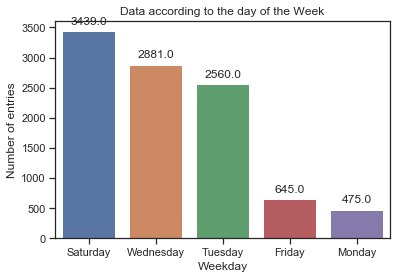

In [14]:
sns.set(rc={'figure.figsize':(6,4)})
sns.set(style="ticks", color_codes=True)
plot = sns.countplot(x='Weekday', data = MyData, order = MyData['Weekday'].value_counts().index)
plot.set_title('Data according to the day of the Week')
plot.set_xlabel('Weekday')
plot.set_ylabel('Number of entries')
label(plot)

### From the above plot, we can understand the spread of the data according to the weekday. Clearly, we do not have data from Sundays and Thursdays over the past 6 months. 

### Double click on the plot to have a zoomed view

<Figure size 1600x480 with 0 Axes>

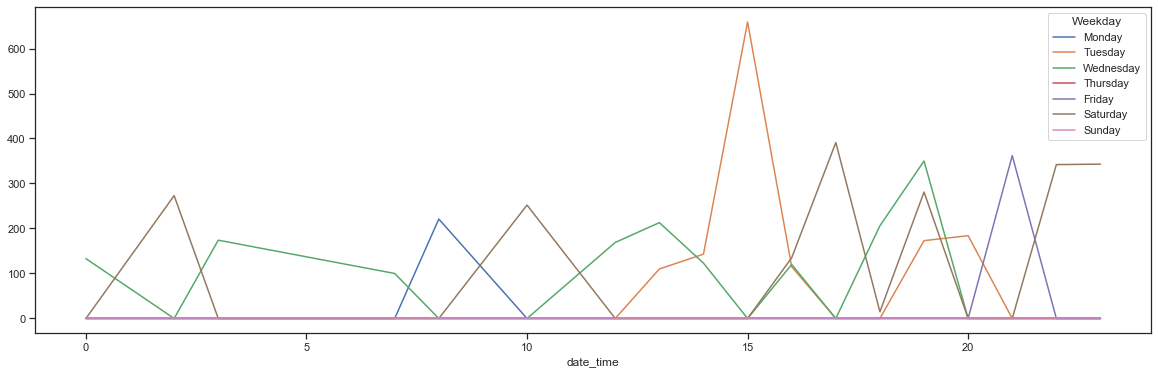

In [15]:
figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
sns.set(rc={'figure.figsize':(20,6)})
sns.set(style="ticks", color_codes=True)
names = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday']
category_type = CategoricalDtype(categories=names, ordered=True)
MyData['Weekday'] = MyData['Weekday'].astype(category_type)
MyData.groupby([pd.to_datetime(MyData['date_time']).dt.hour, 'Weekday'])['UrlCheck'].sum().fillna(0).unstack().plot()
plt.show()

### Plot showing the how busy the website is, according to the hour of the day

#### From the Plot, one main observation is:
 - On Tuesdays, between 2 PM and 4 PM the traffice on the website is significantly high
 

#### Functions to key or value from a defined dictionary

In [16]:
def get_value(dictionary, this_key): 
    '''
    Gives the value of a inputed key
    dictionary: Dictionary from where the key has to be searched
    this_key: key for which value is required
    '''
    for key, value in dictionary.items(): 
         if this_key==key: 
            return value 
def get_key(dictionary, this_value): 
    '''
    Gives the key of a inputed value
    dictionary: Dictionary from where the key has to be searched
    this_value: value for which key is required
    '''
    for key, value in dictionary.items(): 
         if this_value == value: 
                return key

# Data Cleaning

### Handling Missing Data

#### There might be few users who were registered users and have become members after some time, initially they would not have a member_id, but once they are members, they would have one. Let us see if there are any cases like above.

In [17]:
reg_dict={}
count=0
for index, row in MyData.iterrows():
    register_id = row['register_id']
    
    if pd.notnull(register_id) and pd.notnull(row['member_id']): 
        
        if register_id in reg_dict:
            continue
        else: 
            #print(' One ')
            reg_dict.update({row['register_id']:row['member_id']})  

for index, row in MyData.iterrows():
    register_id=row['register_id']
    if pd.notnull(register_id):
        member_id=get_value(reg_dict, register_id)
        
        #print(member_id)
        old_member_id=MyData.at[index, 'member_id']
        if old_member_id!=member_id and member_id!=None:
            count+=1
            print('Change in member_id from', old_member_id, member_id)
            print(index)
print('There are', count, 'users with the above condition')  

There are 0 users with the above condition


#### Similarly, having only member_id in few months and later also possessing register_id once registered

In [18]:
mem_dict={}
count=0
for index, row in MyData.iterrows():  
    member_id = row['member_id']
    
    if pd.notnull(row['register_id']) and pd.notnull(member_id): 
        
        if member_id in mem_dict:
            continue
        else: 
            #print(' One ')
            mem_dict.update({member_id:row['register_id']})
            
count=0
for index, row in MyData.iterrows():
    member_id=row['member_id']
    if pd.notnull(member_id):
        register_id=get_value(mem_dict, member_id)
        
        #print(member_id)
        old_register_id=MyData.at[index, 'register_id']
        if old_register_id!=register_id and register_id!=None:
            count+=1            
            MyData.at[index, 'register_id'] = register_id
            
print('There are', count, 'users with the above condition')
        

There are 29 users with the above condition


#### Handling NULL URLs

 - URL being Null --> Logical Understanding is, these records have the HomePage of the website. Since there was no click recorded on the website, it is NULL Value. So, few records only accessed the HomeContent. There are 4494 records where URL is missing. 
 
 - NULL url - replaced by HomePage

### Processing the URL

In [19]:
def url_process(url):
    '''
    Funtion to clean the url and retrieve the words list from url
    input: url
    output: words in url
    '''
    url_contents=(url.replace(':', '/')).replace('.', '/').replace('-', '/').replace('_', '/').split('/')
    # To remove duplicates from the list
    url_contents=list(dict.fromkeys(url_contents))
    url_contents = [elem for elem in url_contents if elem not in ('www', 'html','')]
    return url_contents
    

In [20]:
def url_clean(url):
    '''
    Returns URLContents if URL is not NULL, 
    else returns empty list
    '''
    if pd.notnull(url):  
        url_contents = url_process(url)
        return url_contents
    return []

In [21]:
MyData['URLContents'] =  [url_clean(url) for url in MyData['url']]

In [22]:
MyData.head(3)

,member_id,browser_id,register_id,date_time,url,UrlCheck,Weekday,URLContents
0,NaN,3.020000e+37,NaN,2020-08-08T19:09:26.000Z,NaN,0,Saturday,[]
1,5.443924e+09,4.830000e+37,NaN,2020-08-08T19:53:48.000Z,www:/money/taxes/info-2020/states-that-dont-ta...,1,Saturday,"[money, taxes, info, 2020, states, that, dont,..."
2,NaN,4.830000e+37,NaN,2020-08-08T19:32:18.000Z,games:/games/bubble-dragons,1,Saturday,"[games, bubble, dragons]"


#### Setting a Category from the URL Contents

In [23]:
def set_category(urlcontents):
    if len(urlcontents)==0:
        return 'HomePage'
    if 'games' in urlcontents:
        return 'Games'
    elif 'health' in urlcontents:
        return 'Health'
    elif 'secure' in urlcontents:
        return 'Login'
    
    elif 'jobs' in urlcontents:
        return 'Job Search'
    elif 'job' in urlcontents:
        return 'Job Search'
    elif 'money' in urlcontents:
        return 'Money/Retirement'
    elif 'work' in urlcontents:
        return 'Job Search'
    elif 'videos' in urlcontents:
        return 'Entertainment/Videos'
    elif 'entertainment' in urlcontents:
        return 'Entertainment/Videos'
    elif 'retirement' in urlcontents:
        return 'Money/Retirement'
    
    elif 'rewards' in urlcontents:
        return 'Rewards/Benefits'
    elif 'benefits-discounts' in urlcontents:
        return 'Rewards/Benefits'
    elif 'travel' in urlcontents:
        return 'Others'
    elif 'info' in urlcontents:
        return 'Seeking Info'
    
    elif 'membership' in urlcontents:
        return 'Rewards/Benefits'
    
    elif 'espanol' in urlcontents:
        if 'salud' in urlcontents:
            return 'Health'
        elif 'entretenimiento' in urlcontents:
            return 'Entertainment/Videos'
        return 'Others'
    return 'Others'

In [24]:
MyData['Category'] = [set_category(urlcontents) for urlcontents in MyData['URLContents']]

In [25]:
MyData.head(3)

,member_id,browser_id,register_id,date_time,url,UrlCheck,Weekday,URLContents,Category
0,NaN,3.020000e+37,NaN,2020-08-08T19:09:26.000Z,NaN,0,Saturday,[],HomePage
1,5.443924e+09,4.830000e+37,NaN,2020-08-08T19:53:48.000Z,www:/money/taxes/info-2020/states-that-dont-ta...,1,Saturday,"[money, taxes, info, 2020, states, that, dont,...",Money/Retirement
2,NaN,4.830000e+37,NaN,2020-08-08T19:32:18.000Z,games:/games/bubble-dragons,1,Saturday,"[games, bubble, dragons]",Games


In [26]:
# All the categories/labels in the data
MyData['Category'].unique()

array(['HomePage', 'Money/Retirement', 'Games', 'Health', 'Login',
       'Job Search', 'Entertainment/Videos', 'Rewards/Benefits', 'Others',
       'Seeking Info'], dtype=object)

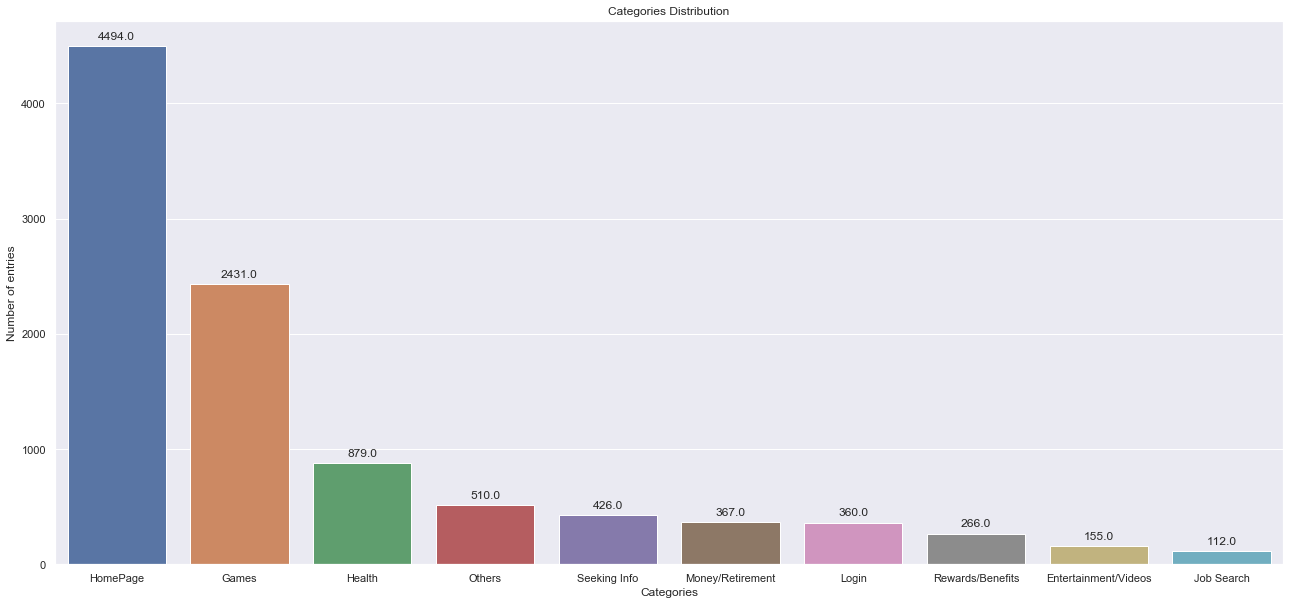

In [27]:
sns.set(rc={'figure.figsize':(22,10)})
plot = sns.countplot(x='Category', data = MyData, order = MyData['Category'].value_counts().index)
plot.set_title('Categories Distribution')
plot.set_xlabel('Categories')
plot.set_ylabel('Number of entries')
label(plot)

#### From the above plot, we can understand that most people played Games on the website, following by Seeking Health Info, etc,.. 

### Double click on the above image to see a zoomed image

### Now, let us look at what time of the day these contents were accessed

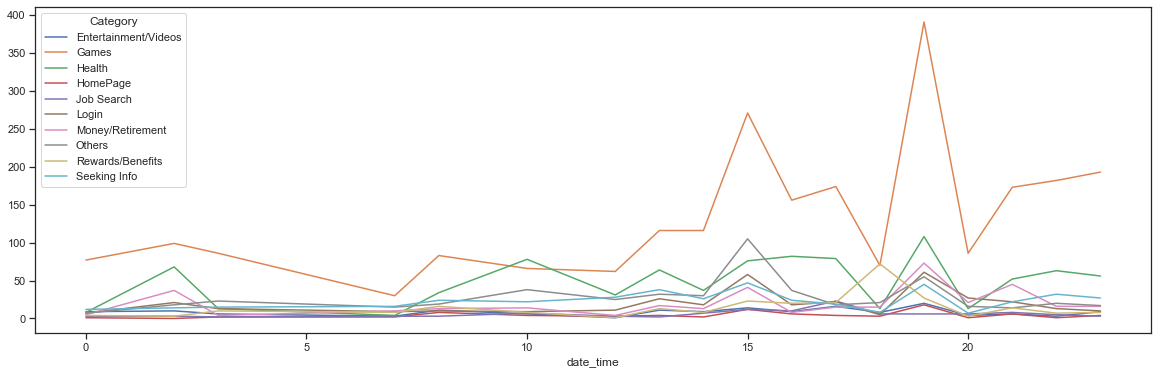

In [28]:

sns.set(rc={'figure.figsize':(20,6)})
sns.set(style="ticks", color_codes=True)
MyData.groupby([pd.to_datetime(MyData['date_time']).dt.hour, 'Category'])['UrlCheck'].sum().fillna(0).unstack().plot()
plt.show()

### Double click on the above image to see a zoomed image

### From the plot, we can say that in between 5:30 PM and 8 PM, website was most accessed by people to play GAMES

In [29]:
MyData.columns

Index(['member_id', 'browser_id', 'register_id', 'date_time', 'url',
       'UrlCheck', 'Weekday', 'URLContents', 'Category'],
      dtype='object')

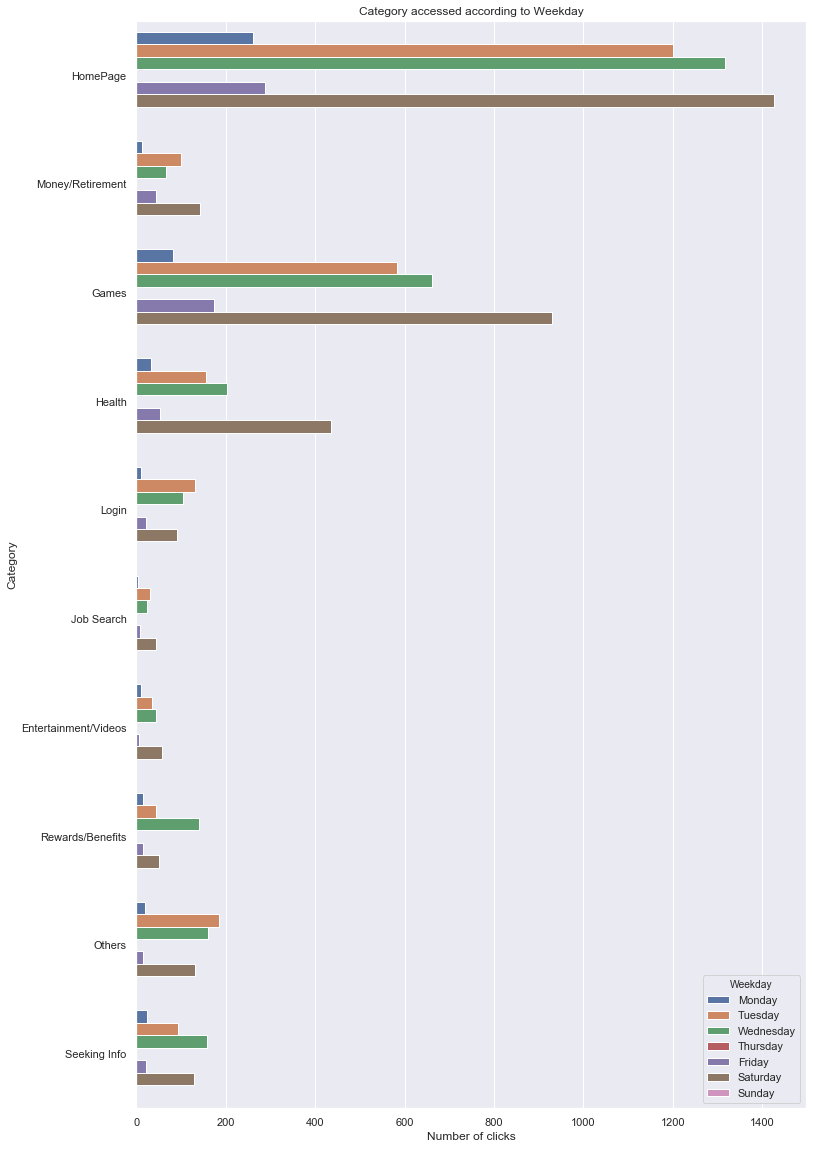

In [30]:
sns.set(rc={'figure.figsize':(12,20)})
plot = sns.countplot(y= "Category", hue = "Weekday", data = MyData)
plot.set_title('Category accessed according to Weekday')
plot.set_xlabel('Number of clicks')
plot.set_ylabel('Category')

plt.show()

#### From the plots:

- 'Games' are mostly played on Saturdays and Wednesdays
- 'Health' content is mostly accessed on Saturdays

# Data Preparation

### Need for new_id to not loose the data since there are a lot of null values

Since there are many null values in member_id and register_id, I wanted to fill it with a unique id, as following:

- New_id = if member_id and register id is not null --> RMx (x will increment by 1)
-         if only member_id is present --> Mx
-         if only register_id --> Rx
-         if none --> Nx


In [31]:
def give_new_id (member_id, register_id):
    global iter1, iter2, iter3, iter4
    
    if pd.notnull(member_id) and pd.notnull(register_id):
        iter1+=1
        return 'RM'+str(iter1)
    
    elif pd.notnull(member_id):
        iter2+=1
        return 'M'+str(iter2)
    elif pd.notnull(register_id):
        iter3+=1
        return 'R'+str(iter3)
    else:
        iter4+=1
        return 'N'+str(iter4)
    
iter1, iter2, iter3, iter4 = 0,0,0,0
temp_list=[]
new_id_dict=dict()
for index, row in MyData.iterrows():
    
        member_id=row['member_id']
        register_id=row['register_id']
        if [member_id, register_id] in new_id_dict.values():
            temp_list.append(get_key(new_id_dict, [member_id, register_id]))
            continue
        new_id=give_new_id(member_id, register_id)
        temp_list.append(new_id)
        new_id_dict.update({new_id:[member_id, register_id]})
        
        

In [32]:
len(new_id_dict)

8977

### So, there are 8977 unique IDs, meaning 8977 users have tried to access the website for various reasons. (Assuming all  the null entries to be different users)

In [33]:
MyData['ID'] = temp_list

In [34]:
MyData.head(3)

,member_id,browser_id,register_id,date_time,url,UrlCheck,Weekday,URLContents,Category,ID
0,NaN,3.020000e+37,NaN,2020-08-08T19:09:26.000Z,NaN,0,Saturday,[],HomePage,N1
1,5.443924e+09,4.830000e+37,NaN,2020-08-08T19:53:48.000Z,www:/money/taxes/info-2020/states-that-dont-ta...,1,Saturday,"[money, taxes, info, 2020, states, that, dont,...",Money/Retirement,M1
2,NaN,4.830000e+37,NaN,2020-08-08T19:32:18.000Z,games:/games/bubble-dragons,1,Saturday,"[games, bubble, dragons]",Games,N2


### Drop unwanted columns for analysis

In [35]:
temp_data = MyData.copy()
temp_data.columns

Index(['member_id', 'browser_id', 'register_id', 'date_time', 'url',
       'UrlCheck', 'Weekday', 'URLContents', 'Category', 'ID'],
      dtype='object')

In [36]:
temp_data=temp_data.drop(['member_id', 'browser_id', 'register_id', 'date_time', 'url', 'UrlCheck', 'Weekday'], axis=1)

In [37]:
temp_data.head(3)

,URLContents,Category,ID
0,[],HomePage,N1
1,"[money, taxes, info, 2020, states, that, dont,...",Money/Retirement,M1
2,"[games, bubble, dragons]",Games,N2


#### There are multiple entries of same user.

#### Groupby to concatenate results

In [38]:
final_data=temp_data.groupby('ID').agg({'URLContents':'sum', 'Category': lambda x: '@'.join(x)}).copy()

In [39]:
final_data.head(5)

,URLContents,Category
ID,,
M1,"[money, taxes, info, 2020, states, that, dont,...",Money/Retirement
M10,"[health, conditions, treatments, info, 2020, l...",Health
M100,"[health, conditions, treatments, info, 2020, e...",Health
M101,"[health, conditions, treatments, info, 2020, e...",Health
M102,"[health, conditions, treatments, info, 2020, f...",Health


### URLContents are words

### Let us analyze some words

In [40]:
# Import Libraries required for NLP
from nltk.probability import FreqDist
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jimev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
def remove_stopwords(contents): 
    '''
    Removes stop_words from the URL Contents
    '''
    return [w for w in contents if not w in stop_words]


In [43]:
for index, row in final_data.iterrows():
    final_data.at[index, 'Category'] = list(set((row['Category']).split('@')))
    final_data.at[index, 'URLContents'] = ' '.join(remove_stopwords(final_data.at[index, 'URLContents']))

In [44]:
final_data.head(3)

,URLContents,Category
ID,,
M1,money taxes info 2020 states dont tax retireme...,[Money/Retirement]
M10,health conditions treatments info 2020 lung co...,[Health]
M100,health conditions treatments info 2020 epa app...,[Health]


# Model Building

### This is a Multi-Label Problem. Meaning, a person can play games and also be interest in Health info and etc..,

#### Transforming target_variable

In [45]:
## All the required Libraries for Model Building
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [46]:


multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(final_data['Category'])

# transform target variable
y = multilabel_binarizer.transform(final_data['Category'])

In [47]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

In [48]:
xtrain, xval, ytrain, yval = train_test_split(final_data['URLContents'], y, test_size=0.2, random_state=9)

In [49]:
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

In [50]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [51]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

C:\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False),
                    n_jobs=None)

In [52]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [53]:
# One random output
y_pred[1000]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [54]:
multilabel_binarizer.inverse_transform(y_pred)[1000]

('Entertainment/Videos', 'HomePage')

In [55]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.9418221734357848

In [56]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

In [57]:
t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

In [58]:
# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.9446202531645569

In [59]:
def results(value):
    input_data=final_data.at[value[0], 'URLContents']
    input_data_vec = tfidf_vectorizer.transform([input_data])
    input_data_pred = clf.predict(input_data_vec)
    return multilabel_binarizer.inverse_transform(input_data_pred)
    

In [60]:
def direct_results(input_data):
    input_data_vec = tfidf_vectorizer.transform([input_data])
    input_data_pred = clf.predict(input_data_vec)
    return multilabel_binarizer.inverse_transform(input_data_pred)
    

In [61]:
MyData.head(3)

,member_id,browser_id,register_id,date_time,url,UrlCheck,Weekday,URLContents,Category,ID
0,NaN,3.020000e+37,NaN,2020-08-08T19:09:26.000Z,NaN,0,Saturday,[],HomePage,N1
1,5.443924e+09,4.830000e+37,NaN,2020-08-08T19:53:48.000Z,www:/money/taxes/info-2020/states-that-dont-ta...,1,Saturday,"[money, taxes, info, 2020, states, that, dont,...",Money/Retirement,M1
2,NaN,4.830000e+37,NaN,2020-08-08T19:32:18.000Z,games:/games/bubble-dragons,1,Saturday,"[games, bubble, dragons]",Games,N2


In [62]:
def predict_behaviour(member_id=None, register_id=None, url=None):
    global MyData, temp_data
    try:
        
        if member_id==None and register_id==None and url==None:
            print('Invalid Input: Give atleast member_id or register_id of the user that you want to learn the behaviour.\n', \
            'Or atleast provide the recent URL that the user has clicked.\n')
            return 
        elif member_id==None and register_id!=None:
            print('You are requesting behaviour of a user having', register_id, 'as the register_id.\n')
            new_id=MyData.loc[MyData['register_id']==register_id]['ID'].values
            return results(new_id)

        elif member_id!=None and register_id==None:
            print('You are requesting behaviour of a user having', member_id, 'as the member_id.\n')
            new_id=MyData.loc[MyData['member_id']==member_id]['ID'].values
            return results(new_id)
        elif member_id==None and register_id==None and url!=None:
            print('You have entered Users last browsed url. The behaviour of the user might be something like this:\n')            
            input_data=' '.join(remove_stopwords(url_process(url)))
            return direct_results(input_data)

        else:
            print('You are requesting behaviour of a user having ', member_id, 
                  ' as the member_id and ', register_id, ' as the register_id.\n')
            value=MyData.loc[MyData['member_id']==member_id]['ID'].values
            return results(value) 
    except IndexError: 
        print ('Oops! Input ID is wrong')

    

In [63]:
predict_behaviour(member_id=4993978974, register_id=100265260)

You are requesting behaviour of a user having  4993978974  as the member_id and  100265260  as the register_id.



[('HomePage', 'Login')]

In [64]:
predict_behaviour(url='www:/health/conditions-treatments/info-2020/avoid-low-concentrate-hand-sanitizers.html')

You have entered Users last browsed url. The behaviour of the user might be something like this:



[('Health',)]

In [65]:
predict_behaviour(member_id=4097029971)

You are requesting behaviour of a user having 4097029971 as the member_id.



[('Seeking Info',)]

In [66]:
predict_behaviour(register_id=88770434)

You are requesting behaviour of a user having 88770434 as the register_id.



[('HomePage', 'Rewards/Benefits')]

## With the above function predict_behavior, we can predict the behaviour of users

### K-Means Clustering

In [67]:
cluster_data=final_data.copy()

In [68]:
cluster_data.head(3)

,URLContents,Category
ID,,
M1,money taxes info 2020 states dont tax retireme...,[Money/Retirement]
M10,health conditions treatments info 2020 lung co...,[Health]
M100,health conditions treatments info 2020 epa app...,[Health]


In [69]:
X_train = cluster_data['URLContents']

In [70]:
X_train

ID
M1       money taxes info 2020 states dont tax retireme...
M10      health conditions treatments info 2020 lung co...
M100     health conditions treatments info 2020 epa app...
M101     health conditions treatments info 2020 epa app...
M102     health conditions treatments info 2020 fda han...
                               ...                        
RM995                               games spider solitaire
RM996                                                     
RM997                                         rewards earn
RM998    games original klondike solitaire games origin...
RM999                                secure account myaarp
Name: URLContents, Length: 8977, dtype: object

In [71]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

In [72]:
from sklearn.cluster import KMeans

In [73]:
modelkmeans=KMeans(n_clusters=10, init='k-means++', n_init=100)
modelkmeans.fit(X_train_tfidf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=100, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Model Accuracy: 

## Logistic Regression ---- 94.46%

## End of Analysis! Thank You! 